In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv(r'C:\Users\rohin\OneDrive\Desktop\Datasets\Churn_Modelling.csv')

In [4]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
dataset.head(2
)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# Split variables

In [6]:
x=dataset.iloc[:,3:13]

In [7]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
y=dataset.iloc[:,13]

In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# One Hot Encoding

In [8]:
x=pd.get_dummies(x,columns=['Geography','Gender'],drop_first=True)

In [9]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


# Train and Test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [13]:
x_train=sc.fit_transform(x_train)

In [14]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [15]:
x_test=sc.transform(x_test)

# BUILDING THE NEURAL NETWORK ALGORITHM

# import required libraries

In [16]:
import tensorflow as tf

In [17]:
#sequential is a class..to initialize the neural network

from tensorflow.keras.models import Sequential
#layers
from tensorflow.keras.layers import Dense

# Initialize the neural network model

In [18]:
model=Sequential()

#I have to call the constructor of the seq class to inti the model
#here we created a model which is empty

# add Input layer

In [19]:
x_train.shape[1]

11

In [20]:
#input_dim---no of neurons
#kernel_initializer--initialize the weights
#--after applying the weights..data transformation takes place through activation function
#activation--relu
#units--no.of outputs from each neuron of input layer& also no.of neurons(inputs) to next(hidden) layer
model.add(Dense(input_dim=x_train.shape[1],kernel_initializer='random_uniform',activation='relu',units=30))

# add hidden layer

In [21]:
model.add(Dense(kernel_initializer='random_uniform',activation='relu',units=15))
model.add(Dense(kernel_initializer='random_uniform',activation='relu',units=20))

# Add output layer

In [22]:
model.add(Dense(kernel_initializer='random_uniform',activation='sigmoid',units=1))


# Compile the model

In [56]:
#compile--defining the strategies to be followed by NN while training the process

In [57]:
ada=tf.keras.optimizers.Adam(learning_rate=0.1)

In [58]:
#loss==error calculating strategy
#binary_crossentropy--logloss for binary classification
#optimizer---weights updation strategy
#adam--mini batch gradient descent or optimizer='adam'
#metrics--model performance calculating strategy
model.compile(loss='binary_crossentropy',optimizer=ada,metrics=["accuracy"])

# Plotting the model

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,166
Trainable params: 1,166
Non-trainable params: 0
_________________________________________________________________


In [60]:
from tensorflow.keras.utils import plot_model

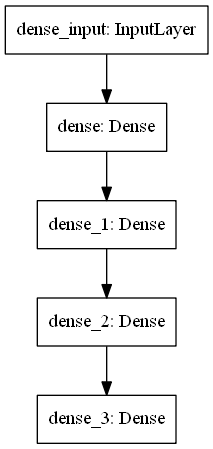

In [61]:
plot_model(model)

# Train the model

In [62]:
#model.fit(x_train,y_train,epochs=50,batch_size=32)
#to plot accuracy and loss, before training the model...we will assign to a variable(all my loss and accuracy will be stoed in a history variable)
history=model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5765 - accuracy: 0.7661
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5001 - accuracy: 0.7927
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4852 - accuracy: 0.7994
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4977 - accuracy: 0.8027
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5160 - accuracy: 0.7893
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5117 - accuracy: 0.7927
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4948 - accuracy: 0.8051
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.7862
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.7939
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5172 - accura

In [63]:
history.history #dict created..in this dict, we've loss and accuracy

{'loss': [0.4884990155696869,
  0.49888524413108826,
  0.4931849539279938,
  0.5088459253311157,
  0.5092737674713135,
  0.5091540813446045,
  0.5092836618423462,
  0.5109325051307678,
  0.5097323656082153,
  0.5096328258514404,
  0.5094237327575684,
  0.5088638663291931,
  0.5087761878967285,
  0.5092008709907532,
  0.5095880031585693,
  0.509783923625946,
  0.5094005465507507,
  0.5100992918014526,
  0.5099050402641296,
  0.5108974575996399,
  0.5086231231689453,
  0.5100954174995422,
  0.510370671749115,
  0.5087555646896362,
  0.509494423866272,
  0.5098781585693359,
  0.5106852650642395,
  0.5097829103469849,
  0.5091406106948853,
  0.5097487568855286,
  0.5104328989982605,
  0.5093190670013428,
  0.5096760988235474,
  0.5103670358657837,
  0.5081996321678162,
  0.5093073844909668,
  0.5096110701560974,
  0.5103688836097717,
  0.5096991658210754,
  0.5105295777320862,
  0.5091019868850708,
  0.5089749693870544,
  0.5090534090995789,
  0.5111835598945618,
  0.5094408988952637,
  0.

In [64]:
train_acc=history.history['accuracy']

In [65]:
epoch=list(range(1,101))

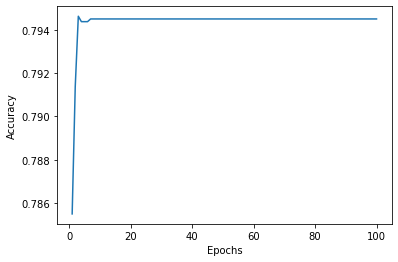

In [66]:
plt.plot(epoch,train_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [67]:
train_loss=history.history['loss']

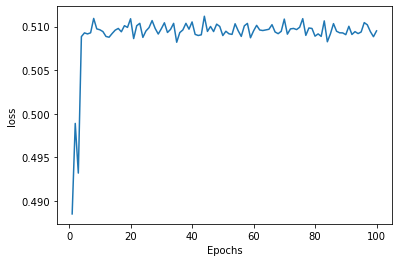

In [68]:
plt.plot(epoch,train_loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

# Predictions

In [69]:
y_pred=model.predict(x_test)

In [70]:
y_pred

array([[0.16],
       [0.16],
       [0.16],
       ...,
       [0.16],
       [0.16],
       [0.16]], dtype=float32)

In [71]:
y_pred=y_pred>0.5


In [72]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [73]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,y_pred)

0.8035

In [76]:
from sklearn.metrics import confusion_matrix 

In [77]:
confusion_matrix(y_test,y_pred)

array([[1607,    0],
       [ 393,    0]], dtype=int64)

In [78]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x280967cb310>)

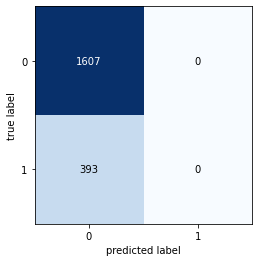

In [79]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

# Real Time predictions

In [80]:
np.set_printoptions(precision=2,suppress=True)

In [81]:
data=x.iloc[10:11,:].values

In [82]:
data

array([[   528.  ,     31.  ,      6.  , 102016.72,      2.  ,      0.  ,
             0.  ,  80181.12,      0.  ,      0.  ,      1.  ]])

In [83]:
#scalaing
data=sc.transform(data)

In [84]:
model.predict(data)

array([[0.16]], dtype=float32)

# Save the Model

In [85]:
model.save('bank_churn.h5')

# Save the scalar file

In [86]:
import joblib

In [87]:
joblib.dump(sc,'bank_churn_scaler.pkl')

['bank_churn_scaler.pkl']

In [88]:
x.iloc[10]

CreditScore             528.00
Age                      31.00
Tenure                    6.00
Balance              102016.72
NumOfProducts             2.00
HasCrCard                 0.00
IsActiveMember            0.00
EstimatedSalary       80181.12
Geography_Germany         0.00
Geography_Spain           0.00
Gender_Male               1.00
Name: 10, dtype: float64